# Overview

This a notebook that inspects the results of a WarpX simulation.

# Instruction

Enter the path of the data you wish to visualize below. Then execute the cells one by one, by selecting them with your mouse and typing `Shift + Enter`

In [1]:
# Import statements
import yt ; yt.funcs.mylog.setLevel(50)
import numpy as np
import scipy.constants as scc
import matplotlib.pyplot as plt
%matplotlib notebook

## Read data in the simulation frame

### Plot data with yt

In [6]:
ds = yt.load( './plotfiles/plt00075/' ) # Create a dataset object
ds.field_list

[('all', 'particle_Bx'),
 ('all', 'particle_By'),
 ('all', 'particle_Bz'),
 ('all', 'particle_Ex'),
 ('all', 'particle_Ey'),
 ('all', 'particle_Ez'),
 ('all', 'particle_cpu'),
 ('all', 'particle_id'),
 ('all', 'particle_momentum_x'),
 ('all', 'particle_momentum_y'),
 ('all', 'particle_momentum_z'),
 ('all', 'particle_position_x'),
 ('all', 'particle_position_y'),
 ('all', 'particle_position_z'),
 ('all', 'particle_weight'),
 ('boxlib', 'Bx'),
 ('boxlib', 'By'),
 ('boxlib', 'Bz'),
 ('boxlib', 'Ex'),
 ('boxlib', 'Ey'),
 ('boxlib', 'Ez'),
 ('boxlib', 'divE'),
 ('boxlib', 'jx'),
 ('boxlib', 'jy'),
 ('boxlib', 'jz'),
 ('boxlib', 'part_per_cell'),
 ('boxlib', 'rho'),
 ('plasma_e', 'particle_Bx'),
 ('plasma_e', 'particle_By'),
 ('plasma_e', 'particle_Bz'),
 ('plasma_e', 'particle_Ex'),
 ('plasma_e', 'particle_Ey'),
 ('plasma_e', 'particle_Ez'),
 ('plasma_e', 'particle_cpu'),
 ('plasma_e', 'particle_id'),
 ('plasma_e', 'particle_momentum_x'),
 ('plasma_e', 'particle_momentum_y'),
 ('plasma_e',


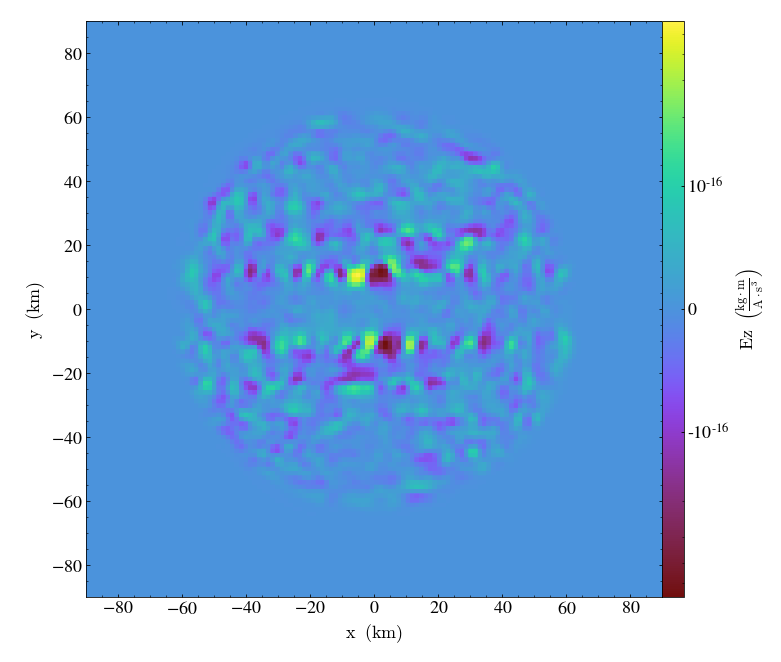

In [7]:

sl = yt.SlicePlot(ds, 2, 'Ez', aspect=1) # Create a sliceplot object
#sl.annotate_particles((10, 'Mpc'),ptype="plasma_p",col='b',p_size=5.0)
#sl.annotate_particles((10, 'Mpc'),ptype="plasma_e",col='r',p_size=5.0)
#sl.annotate_particles(width=(10.e-6, 'm'), p_size=2, ptype='beam', col='black')
#sl.annotate_grids() # Show grids
sl.show() # Show the plot
# sl.save('./toto.png')

### Store quantities in numpy arrays, and plot with matplotlib

/usr/local/lib/python3.5/dist-packages/matplotlib/colors.py:1028: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0



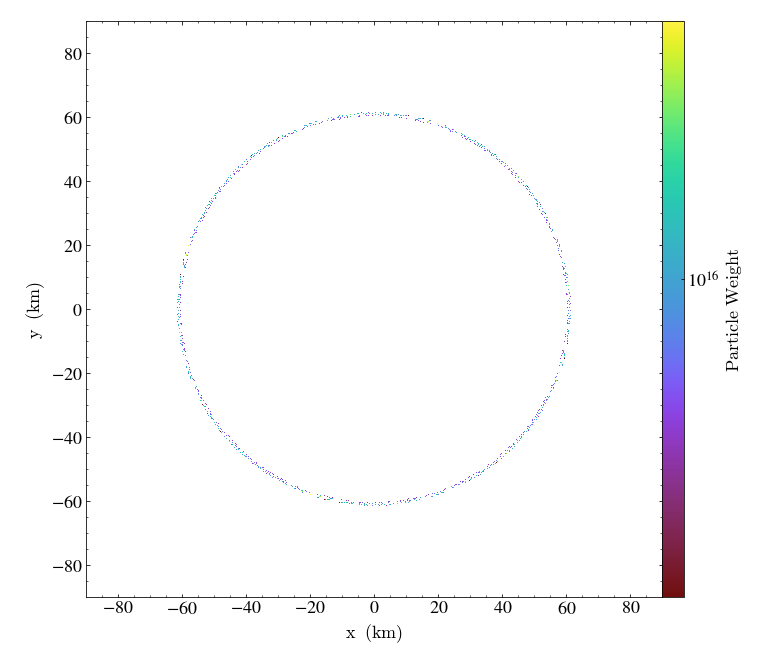

/usr/local/lib/python3.5/dist-packages/matplotlib/colors.py:1028: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


['uniform_ring_50ppc.png']

In [8]:
p = yt.ParticlePlot(ds,('plasma_p', 'particle_position_x'),('plasma_p', 'particle_position_y'),('plasma_p', 'particle_weight'))

p.show()
p.save("uniform_ring_50ppc.png")

/usr/local/lib/python3.5/dist-packages/matplotlib/colors.py:1028: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0



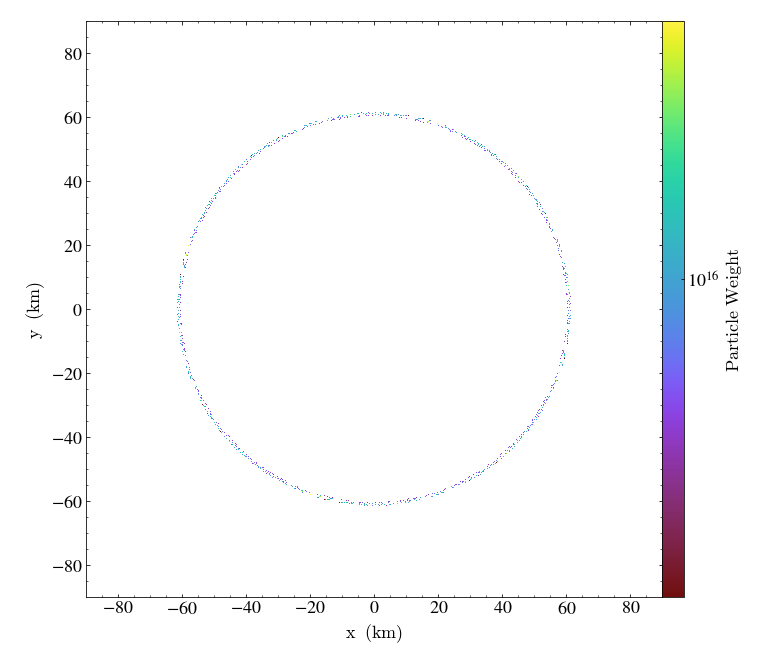

/usr/local/lib/python3.5/dist-packages/matplotlib/colors.py:1028: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


['uniform_ring_50ppc.png']

In [9]:
p = yt.ParticlePlot(ds,('plasma_e', 'particle_position_x'),('plasma_e', 'particle_position_y'),('plasma_e', 'particle_weight'))

p.show()
p.save("uniform_ring_50ppc.png")

In [ ]:


# Get field quantities
all_data_level_0 = ds.covering_grid(level=0,left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Bx = all_data_level_0['boxlib', 'Ex'].v.squeeze()
Dx = ds.domain_width/ds.domain_dimensions
extent = [ds.domain_left_edge[ds.dimensionality-1], ds.domain_right_edge[ds.dimensionality-1],
          ds.domain_left_edge[0], ds.domain_right_edge[0] ]

# Get particle quantities
ad = ds.all_data()
x = ad['beam', 'particle_position_x'].v
z = ad['beam', 'particle_position_y'].v

# Plot image
plt.figure()
plt.imshow(Bx, extent=extent)
plt.scatter(z,x,s=.1,c='k')

# Print all available quantities
ds.field_list

## Read data back-transformed to the lab frame when the simulation runs in the boosted frame (example: 2D run)

In [ ]:
# read_raw_data.py is located in warpx/Tools.
import os, glob
import read_raw_data

In [ ]:
species = 'beam'
iteration = 1
field = 'Ex'

snapshot = './lab_frame_data/' + 'snapshot' + str(iteration).zfill(5)
header   = './lab_frame_data/Header'
allrd, info = read_raw_data.read_lab_snapshot(snapshot, header) # Read field data
F = allrd[field]
print( "Available info: ", *list(info.keys()) )
print("Available fields: ", info['field_names'])
nx = info['nx']
nz = info['nz']
x = info['x']
z = info['z']
xbo  = read_raw_data.get_particle_field(snapshot, species, 'x') # Read particle data
ybo  = read_raw_data.get_particle_field(snapshot, species, 'y')
zbo  = read_raw_data.get_particle_field(snapshot, species, 'z')
uzbo = read_raw_data.get_particle_field(snapshot, species, 'uz')

plt.figure(figsize=(6, 3))
extent = np.array([info['zmin'], info['zmax'], info['xmin'], info['xmax']])
plt.imshow(F, aspect='auto', extent=extent, cmap='seismic')
plt.colorbar()
plt.plot(zbo, xbo, 'g.', markersize=1.)


## Read back-transformed data with hdf5 format (example: 3D run)

In [ ]:
import h5py
import matplotlib.pyplot as plt
f = h5py.File('HDF5_lab_frame_data/snapshot00003', 'r')
print( list(f.keys()) )
# plt.figure()
plt.imshow(f['Ey'][:,,:])